<a href="https://colab.research.google.com/github/daniel-lorenzo/Mecanica/blob/main/TP2/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 2
El rotor de un motor eléctrico tiene una masa $M_r$, su centro de masa en el punto medio entre cojinetes y separado una distancia $e$ del eje de giro. El motor tiene masa total $M_m$ y origina una deformación estática $\delta$ en el conjunto de los resortes de su base.

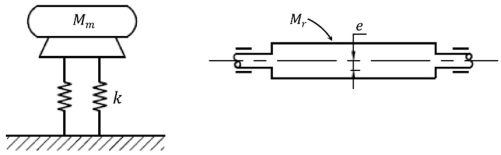

## Solución

In [1]:
# Datos:
M_m = 34.5   # [kg]
delta = 3e-3 # [m]
M_r = 15     # [kg]
e = 0.20e-3  # [m]
g = 9.81     # [m/s**2]

__Determinar:__
### a) La velocidad a la que no debe funcionar el motor, expresada en rpm.

Se sabe que debe evitarse la condición de resonancia, es decir, aquella velocidad de funcionamiento cuya pulsación resulte igual a la natural del sistema, por esta razón:

$$ \omega_{prohibida} = n_c = p = \sqrt{ \frac{k}{m} } \qquad ; \qquad \mbox{recordando que: } \quad \delta_{est} k = g M_m $$

In [2]:
import numpy as np

In [3]:
k = g*M_m/delta
p = np.sqrt(k/(M_m + M_r) )
n_c = p
w_pr = n_c

$$\color{green}{ \mathrm{ \left( \frac{rad}{s} \right) \cdot \left( \frac{1 \; rev}{2 \pi \; rad} \right) \cdot \left( \frac{60 \, s}{1 \; min} \right) \quad \rightarrow \quad \frac{rev}{min} } }$$

In [4]:
#@title Velocidad a la que no debe funcionar el motor
print('w_pr = %.3f [rad/s]'%w_pr)
print('w_pr = %.2f [rpm]'%(w_pr*1/(2*np.pi)*(60/1) ))

w_pr = 47.740 [rad/s]
w_pr = 455.88 [rpm]


### b) La amplitud vertical del movimiento no amortiguado cuando gira al doble de la velocidad no permitida.

Para determinar la amplitud del movimiento forzado, tendremos que averiguar el valor de la fuerza excitadora $F_0$. En este caso, la excitación del sistema esta provista por la excentricidad con que se ha montado el rotor, por lo tanto:

$$ F_0 = M_r \omega_b^2 e \qquad; \qquad\mbox{con: } \quad \omega_b = 2 \omega_{prohibida} $$

In [5]:
w_b = 2*w_pr
Fo = M_r*(w_b**2)*e

In [6]:
#@title Resultados:
print('w_b = %.2f [rpm]'%(w_b/(2*np.pi)*60  ))
print('Fo = %.3f [N]'%Fo)

w_b = 911.76 [rpm]
Fo = 27.349 [N]


Si $n=0$ (sistema sin amortiguamiento) $\Longrightarrow \; A_{max} = \; ?$

$$\color{green}{ A_{max} = {F_0/k \over \displaystyle 1 - \frac{\omega_b^2}{p^2} } }$$

In [7]:
A_max = (Fo/k)/abs(1 - (w_b/p)**2 )

In [8]:
#@title Amplitud vertical cuando gira al doble de la velocidad no permitida
print('A_max = %.4f [mm]'%(A_max*1000))

A_max = 0.0808 [mm]


### c) El amortiguamiento necesario para limitar el movimiento en un 20%, trabajando a la velocidad del punto b.

Si $A \; \downarrow \; 20 \% \; \Rightarrow \; A_c = 0,8 A_b \quad , \quad n_c = p \quad , \quad \omega_c = \omega_b = 2p$

$$ 0,8 A_b = \frac{ F_0/k }{\displaystyle \sqrt{ \left( 1 - \frac{\omega_c^2}{p^2} \right)^2 + \left( 2 \frac{n}{n_c} \frac{\omega_c}{p} \right)^2 } } \quad \Rightarrow \quad
\left\{
\begin{array}{l}
n = \, ? \\
n_c = \, ?
\end{array}
\right. $$

$$ n = \frac{1}{2} \frac{n_c p}{\omega_c} \sqrt{ \left( \frac{F_0/k}{0,8 A_b} \right)^2 - \left( 1 - \frac{\omega_c^2}{p^2} \right)^2 } $$

In [9]:
w_c = 2*p
A_b = A_max
n_3 = (1/2)*(n_c*p/w_c)*np.sqrt( ((Fo/k)/(0.8*A_b))**2 - (1 - w_c**2/p**2)**2 )

In [10]:
#@title Amortiguamiento para limitar el movimiento en un 20% a veloc. del punto b
print('n_3 = %.4f'%n_3)
print('n_c = %.4f'%n_c)

n_3 = 26.8537
n_c = 47.7398


### d) La fuerza transmitida en los casos 2) y 3). Comentar la diferencia entre los valores obtenidos.

La fuerza transmitida a la fundación se obtiene a partir de la expresión general:

$$ F_{transmitida} = F_0 \, \frac{\displaystyle \sqrt{1 + \left( 2 \frac{n}{n_c} \frac{\omega}{p} \right)^2 } }{\displaystyle \sqrt{ \left( 1 - \frac{\omega^2}{p^2} \right)^2 + \left( 2 \frac{n}{n_c} \frac{\omega}{p} \right)^2 } }$$

In [11]:
n_2 = 0

F_2trans = Fo*np.sqrt(1 + (2*(n_2/n_c)*w_b/p)**2 )/ \
           np.sqrt( (1 - w_b**2/p**2)**2 + (2*(n_2/n_c)*w_b/p)**2 )

F_3trans = Fo*np.sqrt(1 + (2*(n_3/n_c)*w_c/p)**2 )/ \
           np.sqrt( (1 - w_c**2/p**2)**2 + (2*(n_3/n_c)*w_c/p)**2 )

In [12]:
#@title Resultados:
print('F_2trans = %.3f [N]'%F_2trans)
print('F_3trans = %.3f [N]'%F_3trans)

F_2trans = 9.116 [N]
F_3trans = 17.957 [N]


No obstante, como la fuerza transmitida es un versor, puede calcularse a partir de sus componentes:

$$\begin{array}{ll}
 F_{total} = \sqrt{ F_k^2 + F_c^2 } \\
 F_k = xk & \mbox{(fuerza - muelle)} \\
 F_c = \omega x c & \mbox{(fuerza - amortiguador)}
 \end{array} $$